### Import Required Libraries

In [2]:
## import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns


### Import Dataset

In [3]:
## Importing the data set
dataset = pd.read_csv('bank-full.csv', delimiter=';')




### Show First 10 Rows

In [4]:
# Show first 10 rows
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
# Show last 10 rows
dataset.tail(10)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


### Show Shape of Dataframe

In [6]:
# Show shape and columns
pd.DataFrame({'Shape': [dataset.shape], 'Columns': [dataset.columns.tolist()]})



,Shape,Columns
0,"(45211, 17)","[age, job, marital, education, default, balanc..."


### Show Data Types

In [7]:
# Show data types
pd.DataFrame(dataset.dtypes, columns=['Data Type'])



,Data Type
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


### Show Summary Statistics

In [8]:
# Show summary statistics
dataset.describe(include='all').T



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


### Check for Duplicates & Missing Values

In [9]:
# Check for duplicate rows
duplicate_count = dataset.duplicated().sum()
print(f'Total duplicate rows: {duplicate_count}')
if duplicate_count > 0:
    display(dataset[dataset.duplicated()])

Total duplicate rows: 0


In [10]:
# Check for missing values
dataset.isnull().sum().to_frame('Missing Values')

,Missing Values
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


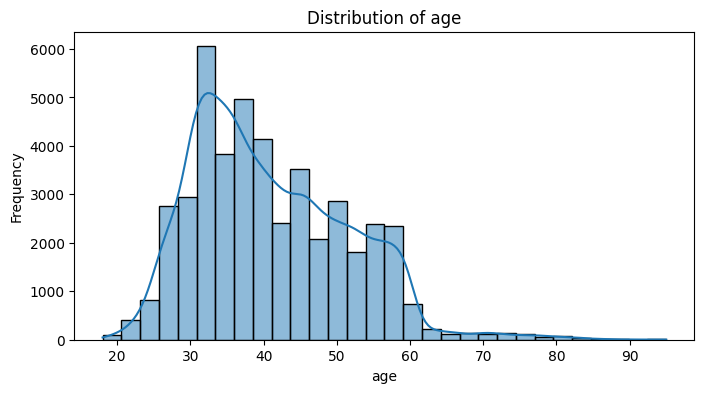

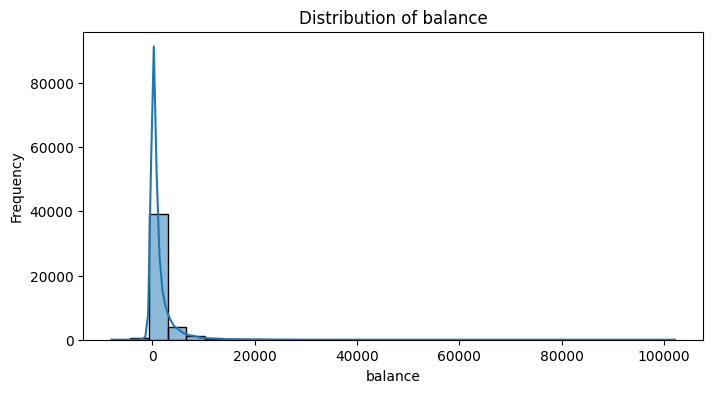

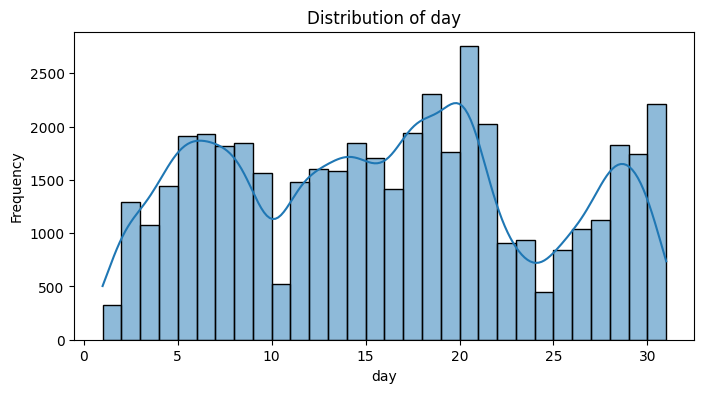

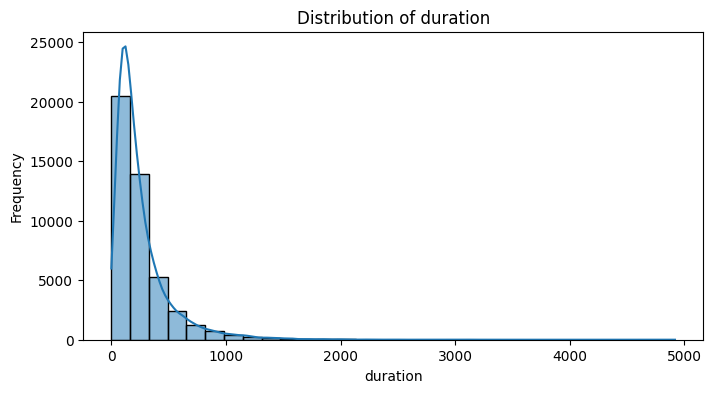

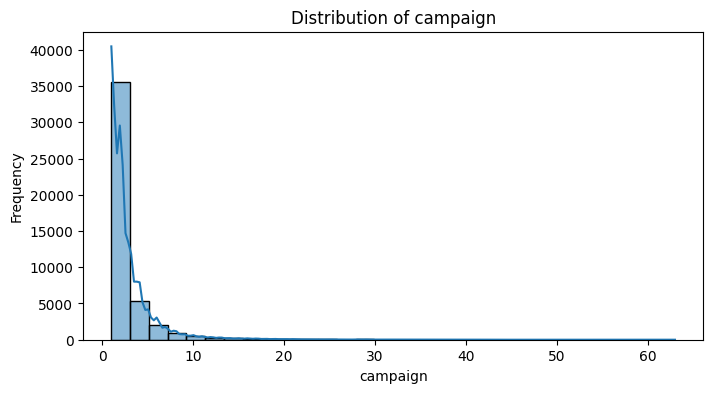

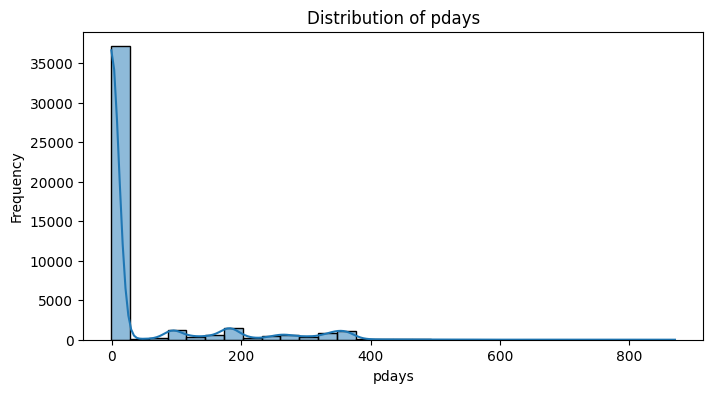

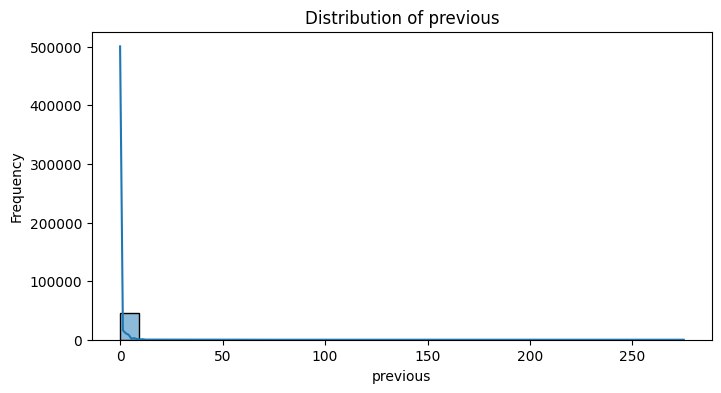

In [11]:
# Analyze distribution of key features
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric features distribution
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()



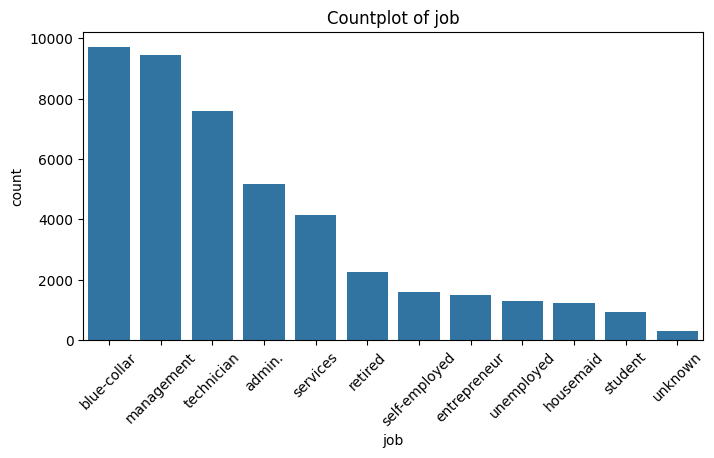

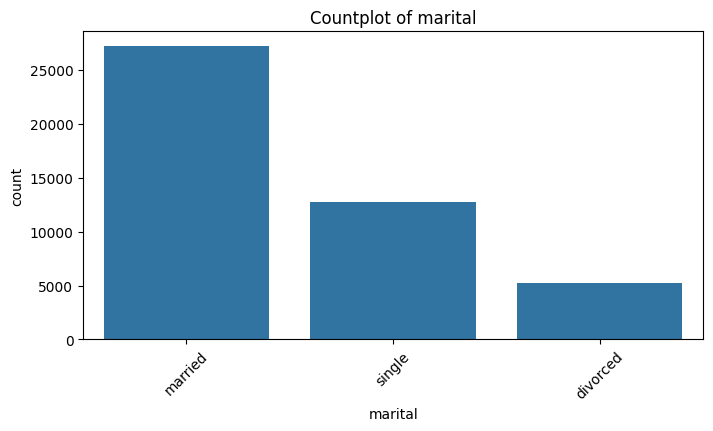

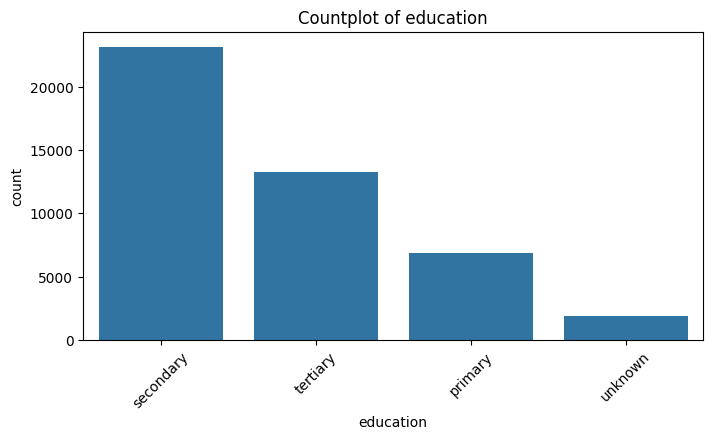

In [12]:
# Categorical features distribution (top 3 by cardinality)
categorical_cols = dataset.select_dtypes(include=['object']).columns
for col in categorical_cols[:3]:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=dataset, x=col, order=dataset[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

### # Check for target class imbalance (y variable)

Class counts:
y
no     39922
yes     5289
Name: count, dtype: int64

Class percentages:
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


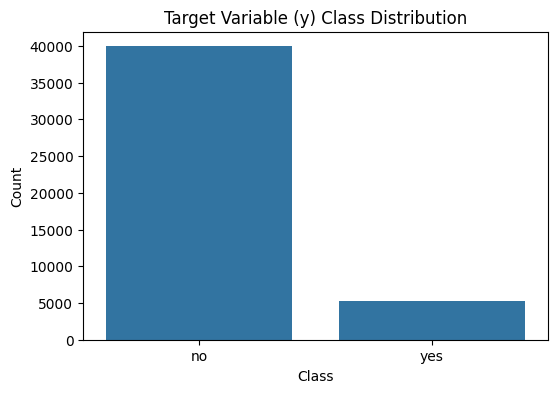

In [13]:

y_counts = dataset['y'].value_counts()
y_percent = dataset['y'].value_counts(normalize=True) * 100
print('Class counts:')
print(y_counts)
print('\nClass percentages:')
print(y_percent)

plt.figure(figsize=(6,4))
sns.countplot(x='y', data=dataset, order=y_counts.index)
plt.title('Target Variable (y) Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### Chatting the Visualizations

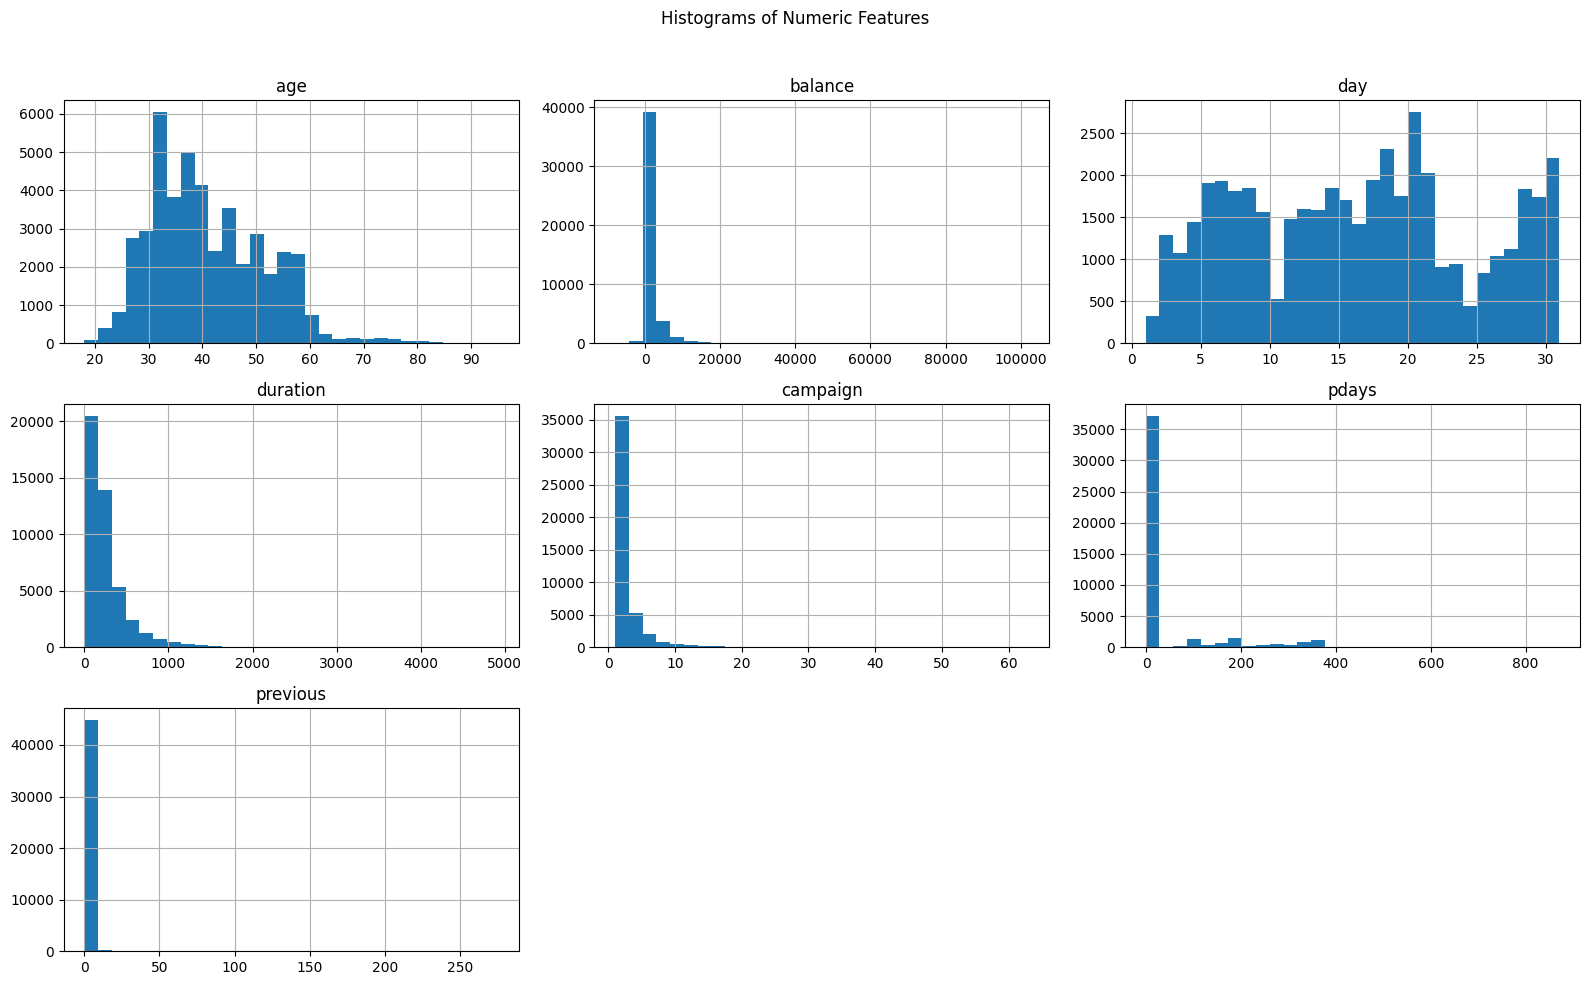

In [14]:
# Summarize insights with visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for all numeric features
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
dataset[numeric_cols].hist(figsize=(16, 10), bins=30)
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



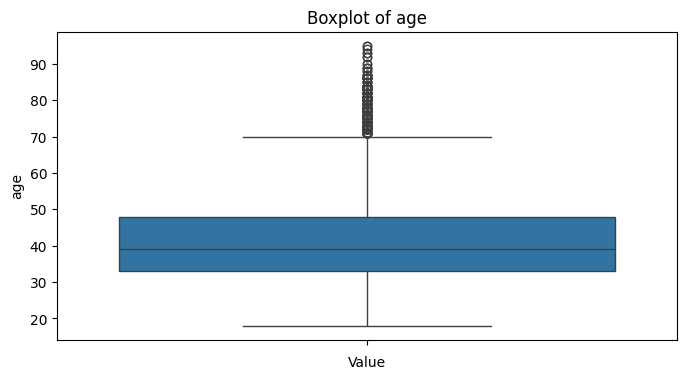

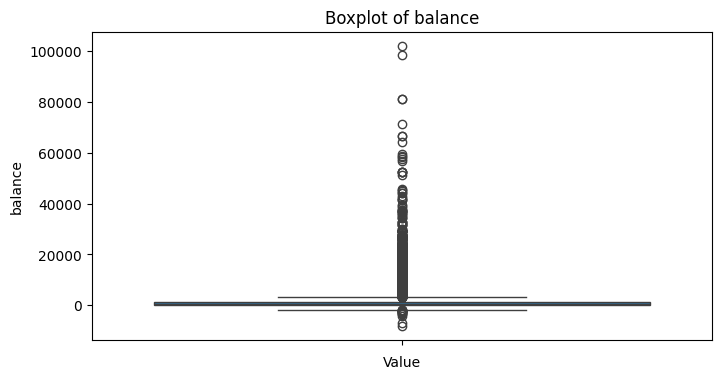

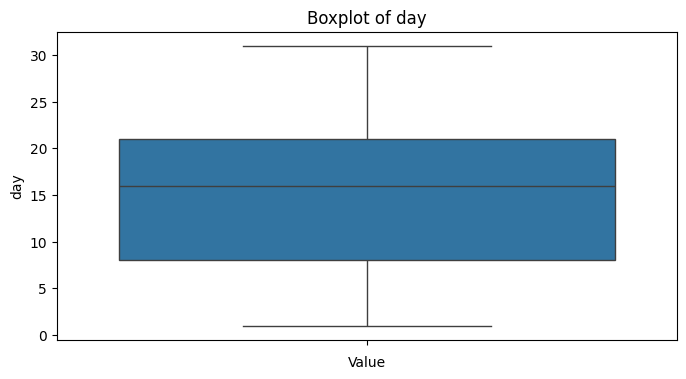

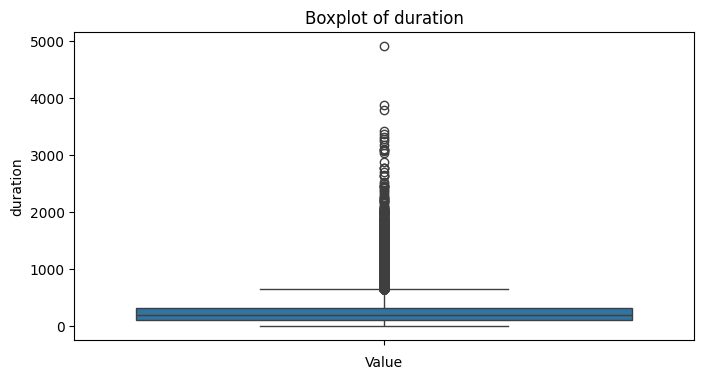

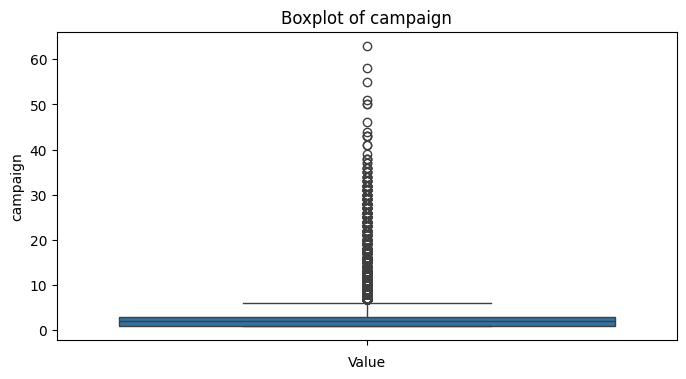

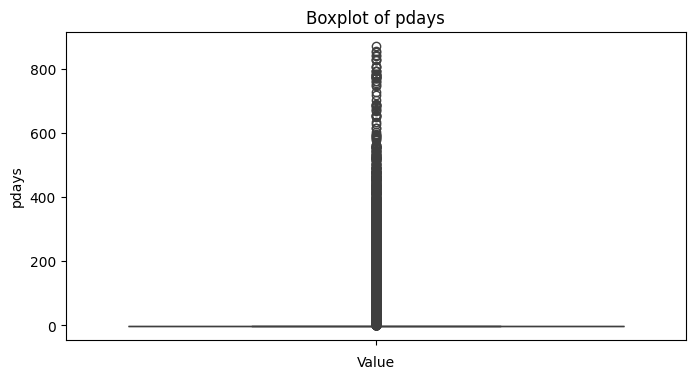

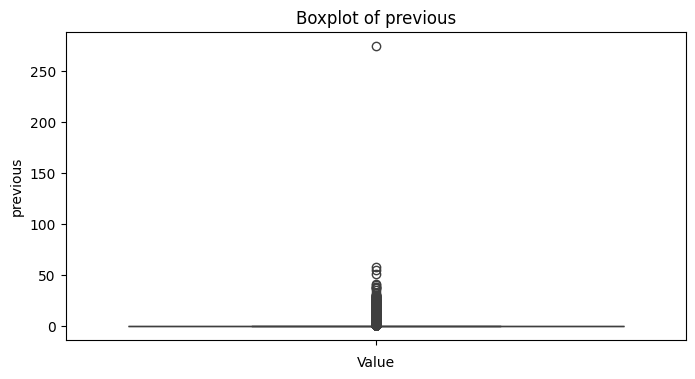

In [15]:
# Boxplots for individual numeric features (vertical, with axis labels and rotated x-axis labels)
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=dataset[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.xlabel('Value')
    plt.xticks(rotation=90)
    plt.show()

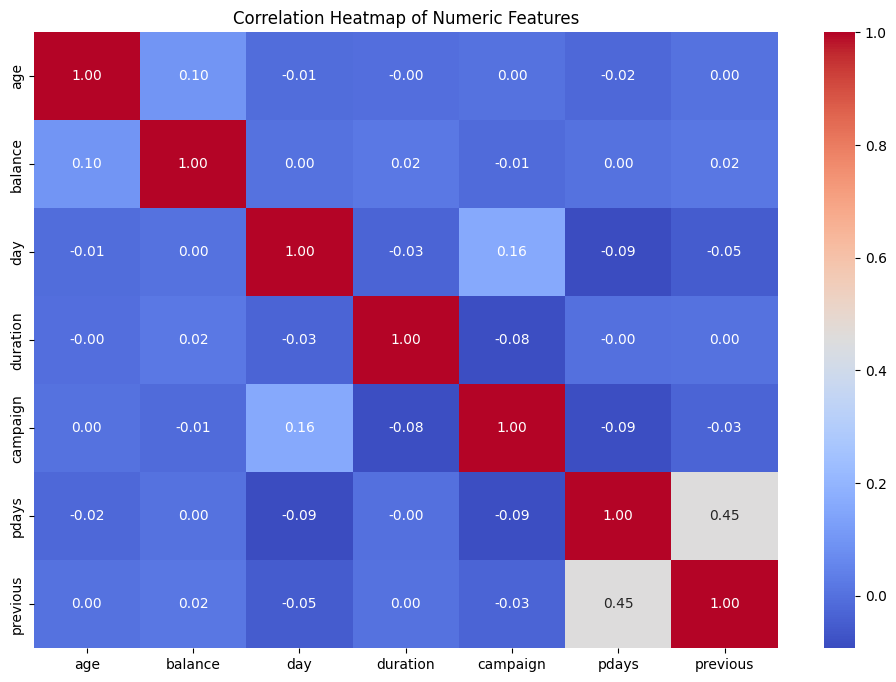

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = dataset[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

### Add new Engineered Features

In [17]:
# Feature engineering: create new DataFrame with selected features
df_features = dataset.copy()

# Campaign Intensity: bin campaign into categories
df_features['campaign_intensity'] = pd.cut(df_features['campaign'], bins=[-1, 2, 5, df_features['campaign'].max()], labels=['low', 'medium', 'high'])

# Job/Education Interaction: combine job and education
df_features['job_education'] = df_features['job'] + '_' + df_features['education']

# Marital & Loan/Housing: combine marital status with loan and housing
df_features['married_with_loan'] = ((df_features['marital'] == 'married') & (df_features['loan'] == 'yes')).astype(int)
df_features['single_with_housing'] = ((df_features['marital'] == 'single') & (df_features['housing'] == 'yes')).astype(int)

# Recent Contact: pdays < 30
df_features['recent_contact'] = (df_features['pdays'] < 30).astype(int)

# Show first 5 rows of new DataFrame
df_features.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,campaign_intensity,job_education,married_with_loan,single_with_housing,recent_contact
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,low,management_tertiary,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,low,technician_secondary,0,1,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,low,entrepreneur_secondary,1,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,low,blue-collar_unknown,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,low,unknown_unknown,0,0,1


### Multicolleneality

In [18]:
# Identify multicollinear features and suggest dropping them
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numeric features from the engineered DataFrame
numeric_df = df_features.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr_matrix = numeric_df.corr().abs()
high_corr_pairs = [(col1, col2) for col1 in corr_matrix.columns for col2 in corr_matrix.columns if col1 != col2 and corr_matrix.loc[col1, col2] > 0.8]

print('Highly correlated feature pairs (correlation > 0.8):')
for pair in set(tuple(sorted(x)) for x in high_corr_pairs):
    print(pair)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
print('\nVariance Inflation Factor (VIF) for each feature:')
print(vif_data)

# Suggest dropping features with VIF > 10
drop_features = vif_data[vif_data['VIF'] > 10]['feature'].tolist()
print(f'\nSuggested features to drop (VIF > 10): {drop_features}')

# Create new DataFrame with dropped features
df_reduced = df_features.drop(columns=drop_features)
print('\nNew DataFrame shape:', df_reduced.shape)
df_reduced.head()

Highly correlated feature pairs (correlation > 0.8):

Variance Inflation Factor (VIF) for each feature:
    feature       VIF
0       age  5.004058
1   balance  1.212908
2       day  3.984268
3  duration  1.901309
4  campaign  1.824694
5     pdays  1.454202
6  previous  1.341641

Suggested features to drop (VIF > 10): []

New DataFrame shape: (45211, 22)


,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,campaign_intensity,job_education,married_with_loan,single_with_housing,recent_contact
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,low,management_tertiary,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,low,technician_secondary,0,1,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,low,entrepreneur_secondary,1,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,low,blue-collar_unknown,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,low,unknown_unknown,0,0,1


In [19]:
# Move target column 'y' to the end of the DataFrame
def move_target_to_end(df, target_col='y'):
    cols = [col for col in df.columns if col != target_col] + [target_col]
    return df[cols]

df_reduced = move_target_to_end(df_reduced, 'y')
df_reduced.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,campaign_intensity,job_education,married_with_loan,single_with_housing,recent_contact,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,low,management_tertiary,0,0,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,low,technician_secondary,0,1,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,low,entrepreneur_secondary,1,0,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,low,blue-collar_unknown,0,0,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,low,unknown_unknown,0,0,1,no


### Skewness of Data

In [20]:
skewness = df_reduced.select_dtypes(include=['int64', 'float64']).skew().to_frame('Skewness')
display(skewness)

,Skewness
age,0.684818
balance,8.360308
day,0.093079
duration,3.144318
campaign,4.898650
pdays,2.615715
previous,41.846454


In [29]:
# Apply Yeo-Johnson transformation to skewed features with negative values
from sklearn.preprocessing import PowerTransformer

df_yeojohnson = df_reduced.copy()
pt = PowerTransformer(method='yeo-johnson')
df_yeojohnson[skewed_feats] = pt.fit_transform(df_yeojohnson[skewed_feats])

# Move y to the end column
cols = [c for c in df_yeojohnson.columns if c != 'y'] + ['y']
df_yeojohnson = df_yeojohnson[cols]

# Show first 5 rows of the transformed DataFrame
df_yeojohnson.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,campaign_intensity,job_education,married_with_loan,single_with_housing,recent_contact,y
0,58,management,married,tertiary,no,0.414773,yes,no,unknown,5,...,-1.108191,-0.472533,-0.4725,unknown,low,management_tertiary,0,0,1,no
1,44,technician,single,secondary,no,-0.410774,yes,no,unknown,5,...,-1.108191,-0.472533,-0.4725,unknown,low,technician_secondary,0,1,1,no
2,33,entrepreneur,married,secondary,no,-0.431122,yes,yes,unknown,5,...,-1.108191,-0.472533,-0.4725,unknown,low,entrepreneur_secondary,1,0,1,no
3,47,blue-collar,married,unknown,no,0.197685,yes,no,unknown,5,...,-1.108191,-0.472533,-0.4725,unknown,low,blue-collar_unknown,0,0,1,no
4,33,unknown,single,unknown,no,-0.432119,no,no,unknown,5,...,-1.108191,-0.472533,-0.4725,unknown,low,unknown_unknown,0,0,1,no


### Scale Numeric Features

In [34]:
# Scale numeric features after Yeo-Johnson transformation
from sklearn.preprocessing import StandardScaler

df_scaled = df_yeojohnson.copy()
numeric_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns.drop('y', errors='ignore')

scaler = StandardScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

df_scaled.head()

# Show first 5 rows of the scaled

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,campaign_intensity,job_education,married_with_loan,single_with_housing,recent_contact,y
0,1.606965,management,married,tertiary,no,0.414773,yes,no,unknown,-1.298476,...,-1.108191,-0.472533,-0.4725,unknown,low,management_tertiary,0,0,1,no
1,0.288529,technician,single,secondary,no,-0.410774,yes,no,unknown,-1.298476,...,-1.108191,-0.472533,-0.4725,unknown,low,technician_secondary,0,1,1,no
2,-0.747384,entrepreneur,married,secondary,no,-0.431122,yes,yes,unknown,-1.298476,...,-1.108191,-0.472533,-0.4725,unknown,low,entrepreneur_secondary,1,0,1,no
3,0.571051,blue-collar,married,unknown,no,0.197685,yes,no,unknown,-1.298476,...,-1.108191,-0.472533,-0.4725,unknown,low,blue-collar_unknown,0,0,1,no
4,-0.747384,unknown,single,unknown,no,-0.432119,no,no,unknown,-1.298476,...,-1.108191,-0.472533,-0.4725,unknown,low,unknown_unknown,0,0,1,no


### Encode Categorical Variables

In [35]:
# Integer encode categorical variables for embeddings
from sklearn.preprocessing import LabelEncoder

df_encoded = df_scaled.copy()
categorical_cols = df_encoded.select_dtypes(include=['object', 'category']).columns.drop('y', errors='ignore')

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Show first 5 rows of the encoded DataFrame
df_encoded.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,campaign_intensity,job_education,married_with_loan,single_with_housing,recent_contact,y
0,1.606965,4,1,2,0,0.414773,1,0,2,-1.298476,...,-1.108191,-0.472533,-0.4725,3,1,18,0,0,1,no
1,0.288529,9,2,1,0,-0.410774,1,0,2,-1.298476,...,-1.108191,-0.472533,-0.4725,3,1,37,0,1,1,no
2,-0.747384,2,1,1,0,-0.431122,1,1,2,-1.298476,...,-1.108191,-0.472533,-0.4725,3,1,9,1,0,1,no
3,0.571051,1,1,3,0,0.197685,1,0,2,-1.298476,...,-1.108191,-0.472533,-0.4725,3,1,7,0,0,1,no
4,-0.747384,11,2,3,0,-0.432119,0,0,2,-1.298476,...,-1.108191,-0.472533,-0.4725,3,1,47,0,0,1,no


In [39]:
# Show first 5 rows 
df_encoded.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,campaign_intensity,job_education,married_with_loan,single_with_housing,recent_contact,y
45206,0.947747,9,1,2,0,-0.052398,0,0,0,0.143418,...,0.737650,-0.472533,-0.472500,3,2,38,0,0,1,yes
45207,2.831227,5,0,0,0,0.275122,0,0,0,0.143418,...,0.134537,-0.472533,-0.472500,3,1,20,0,0,1,yes
45208,2.925401,5,1,1,0,1.495765,0,0,0,0.143418,...,1.323745,2.122381,2.166630,2,2,21,0,0,0,yes
45209,1.512791,1,1,1,0,-0.114235,0,0,1,0.143418,...,1.091724,-0.472533,-0.472500,3,2,5,0,0,1,no
45210,-0.370689,2,1,1,0,0.681838,0,0,0,0.143418,...,0.134537,2.123051,2.175519,1,1,9,0,0,0,no



### Split dataset into train/val/test with stratification

In [40]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# First split: train+val and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: train and val
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)
# This gives 60% train, 20% val, 20% test

print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)

Train: (27126, 21) Val: (9042, 21) Test: (9043, 21)


### Convert into TensorFlow tf.data pipelines

In [41]:
import tensorflow as tf

# Convert train, val, test splits to tf.data.Dataset

train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values, y_train.values))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val.values, y_val.values))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test.values, y_test.values))

# Shuffle and batch datasets
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

# Preview a batch
for features, labels in train_dataset.take(1):
    print('Features shape:', features.shape)
    print('Labels shape:', labels.shape)


Features shape: (32, 21)
Labels shape: (32,)
